In [5]:
#  IMPORT LIBRARIES 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# LOAD DATA 
df = pd.read_csv("netflix_titles.csv")

# RENAME COLUMNS
# Renaming for better understanding
df = df.rename(columns={
    'show_id': 'Show_ID',
    'type': 'Content_Type',
    'title': 'Title',
    'director': 'Director',
    'cast': 'Cast',
    'country': 'Country',
    'date_added': 'Date_Added',
    'release_year': 'Release_Year',
    'rating': 'Rating',
    'duration': 'Duration',
    'listed_in': 'Genres',
    'description': 'Description'
})

In [9]:
# BASIC EDA 
print("\n Missing Values:\n", df.isnull().sum())
print("\n Unique Value Counts:\n", df.nunique())
print("\n Summary Statistics (numerical only):\n", df.describe())

# ROW INDEXING EXAMPLES 
print("\n First 5 Rows:\n", df.head())
print("\n Last 5 Rows:\n", df.tail())
print("\n Sample Row (index 100):\n", df.iloc[100])

# CONVERT 'duration' COLUMN 
# Only for 'TV Shows' where duration is in seasons
df['Duration_Num'] = df['Duration'].str.extract('(\d+)').astype(float)

# OUTLIER DETECTION 
# Outlier detection in Release Year
Q1 = df['Release_Year'].quantile(0.25)
Q3 = df['Release_Year'].quantile(0.75)
IQR = Q3 - Q1

outliers_year = df[(df['Release_Year'] < Q1 - 1.5 * IQR) | (df['Release_Year'] > Q3 + 1.5 * IQR)]
print("\n Number of Release Year Outliers:", outliers_year.shape[0])
print(outliers_year[['Title', 'Release_Year']].head())

# VISUALIZATIONS

# Set style
sns.set(style="darkgrid")


 Missing Values:
 Show_ID            0
Content_Type       0
Title              0
Director        2634
Cast             825
Country          831
Date_Added        10
Release_Year       0
Rating             4
Duration           3
Genres             0
Description        0
dtype: int64

 Unique Value Counts:
 Show_ID         8807
Content_Type       2
Title           8807
Director        4528
Cast            7692
Country          748
Date_Added      1767
Release_Year      74
Rating            17
Duration         220
Genres           514
Description     8775
dtype: int64

 Summary Statistics (numerical only):
        Release_Year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000

 First 5 Rows:
   Show_ID Content_Type                  Title         Director  \
0      s1        Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2      TV Show          Blood & Water             

<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
C:\Users\tabish\AppData\Local\Temp\ipykernel_24548\2604641752.py:13: SyntaxWarning: invalid escape sequence '\d'
  df['Duration_Num'] = df['Duration'].str.extract('(\d+)').astype(float)


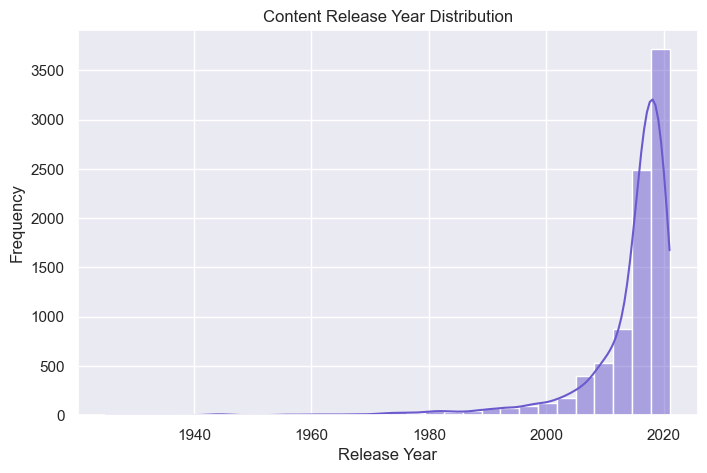

C:\Users\tabish\AppData\Local\Temp\ipykernel_24548\3338024987.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Content_Type', palette='Set2')


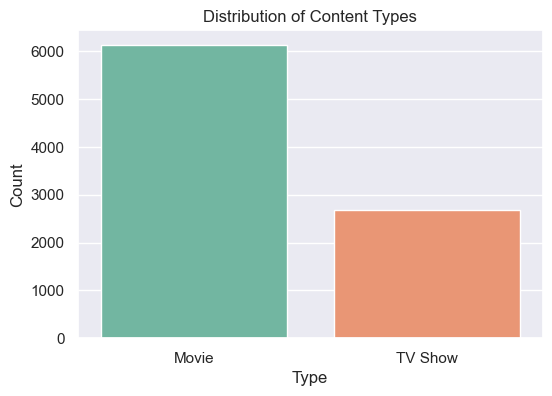


📈 Covariance Matrix:
               Release_Year  Duration_Num
Release_Year     77.803809   -111.688062
Duration_Num   -111.688062   2582.146723


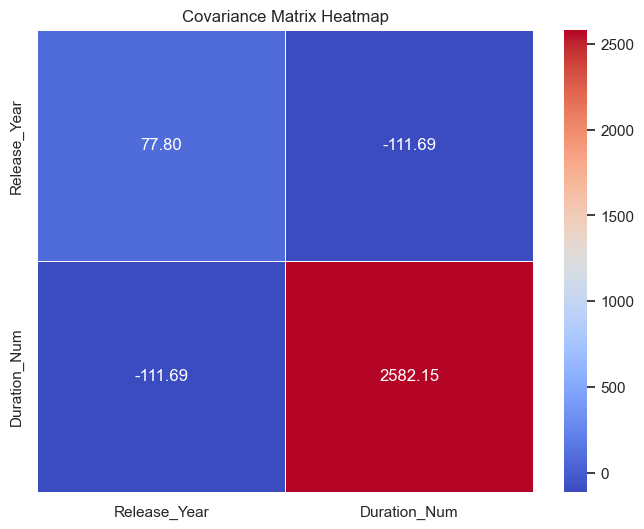

In [11]:
# Histogram: Content by Release Year
plt.figure(figsize=(8, 5))
sns.histplot(df['Release_Year'], bins=30, kde=True, color='slateblue')
plt.title('Content Release Year Distribution')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()

# Countplot: Content Type
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Content_Type', palette='Set2')
plt.title('Distribution of Content Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

# COVARIANCE 
# Select numeric columns only
numeric_df = df[['Release_Year', 'Duration_Num']].dropna()

cov_matrix = numeric_df.cov()
print("\n📈 Covariance Matrix:\n", cov_matrix)

# COVARIANCE HEATMAP 
plt.figure(figsize=(8, 6))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Covariance Matrix Heatmap')
plt.show()